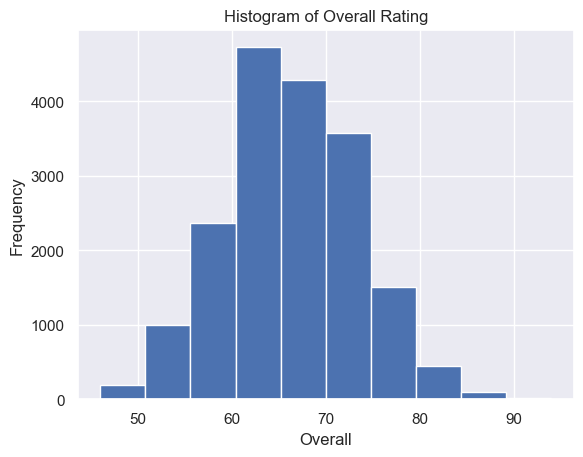

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('fifa19.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.hist(data['Overall'])
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Rating')
plt.show()

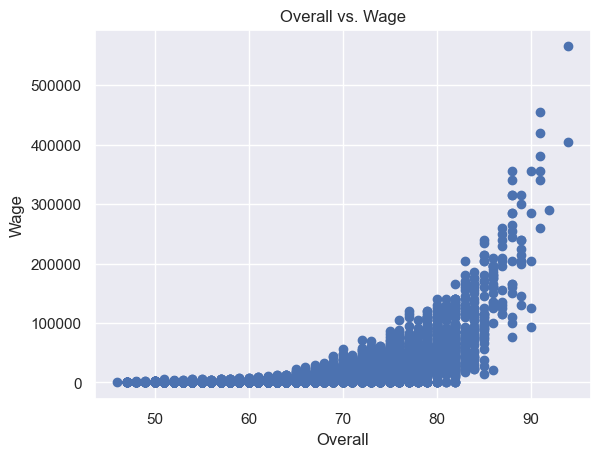

In [20]:
data['wage_euro'] = data['Wage'].str.strip('€')
data['wage_euro'] = data['wage_euro'].str.strip('K')
data['wage_euro'] = data['wage_euro'].astype(float)*1000.0
plt.scatter(data['Overall'], data['wage_euro'])
plt.title('Overall vs. Wage')
plt.ylabel('Wage')
plt.xlabel('Overall')

plt.show()

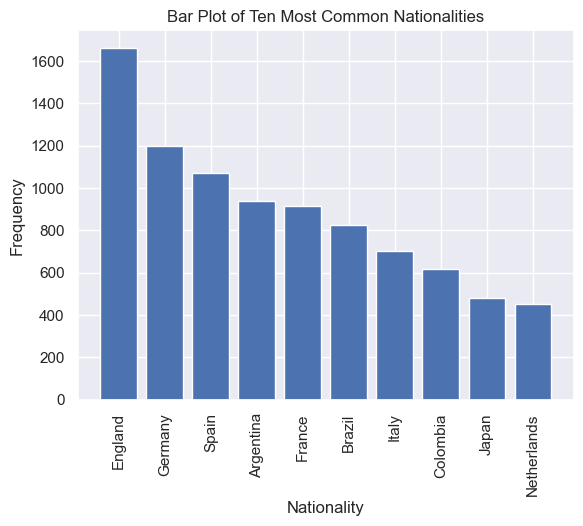

In [21]:
from collections import Counter
nationality_dict = dict(Counter(data['Nationality']).most_common(10))
plt.bar(nationality_dict.keys(), nationality_dict.values())
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.title('Bar Plot of Ten Most Common Nationalities')
plt.xticks(rotation=90)
plt.show()

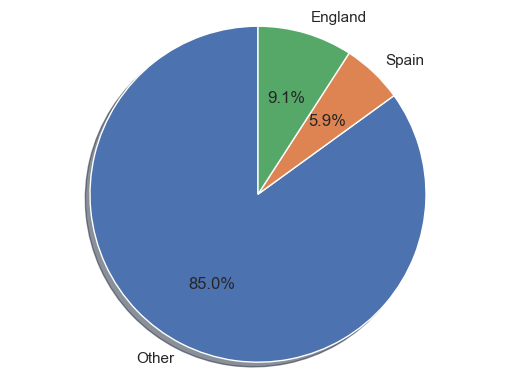

In [22]:
df = data
df.loc[df.Nationality =='England',  'Nationality2'] = 'England'
df.loc[df.Nationality =='Spain',  'Nationality2'] = 'Spain'
df.loc[df.Nationality =='Germany',  'Nationality2'] = 'Germany'
df.loc[~df.Nationality.isin(['England', 'German', 'Spain']),  'Nationality2'] = 'Other'
prop = dict(Counter(df['Nationality2']))

for key, values in prop.items():
    prop[key] = (values)/len(df)*100
fig1, ax1 = plt.subplots()
ax1.pie(prop.values(), labels=prop.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

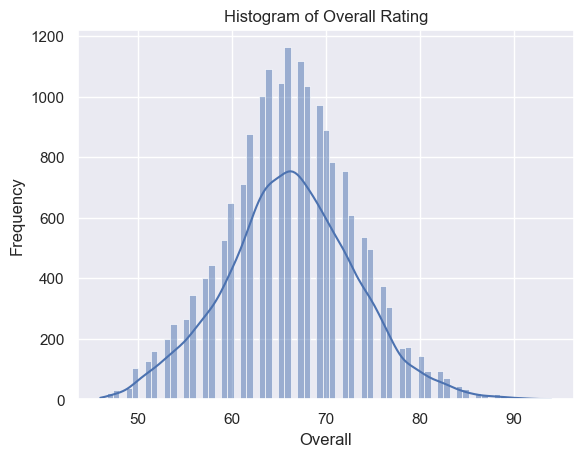

In [23]:
sns.set()
sns.histplot(df['Overall'], kde=True)
plt.xlabel('Overall')

plt.ylabel('Frequency')

plt.title('Histogram of Overall Rating')

plt.show()

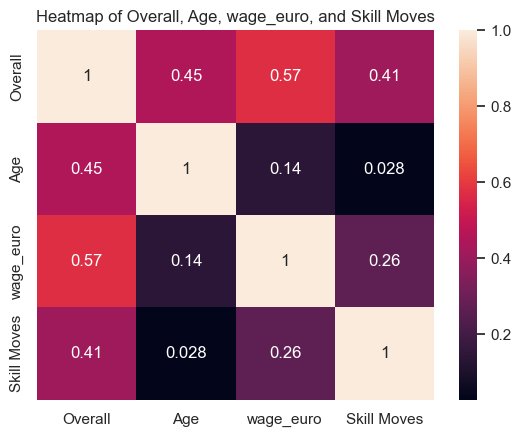

In [24]:
corr = df[['Overall', 'Age', 'wage_euro', 'Skill Moves']].corr()

sns.heatmap(corr, annot=True)

plt.title('Heatmap of Overall, Age, wage_euro, and Skill Moves')

plt.show()

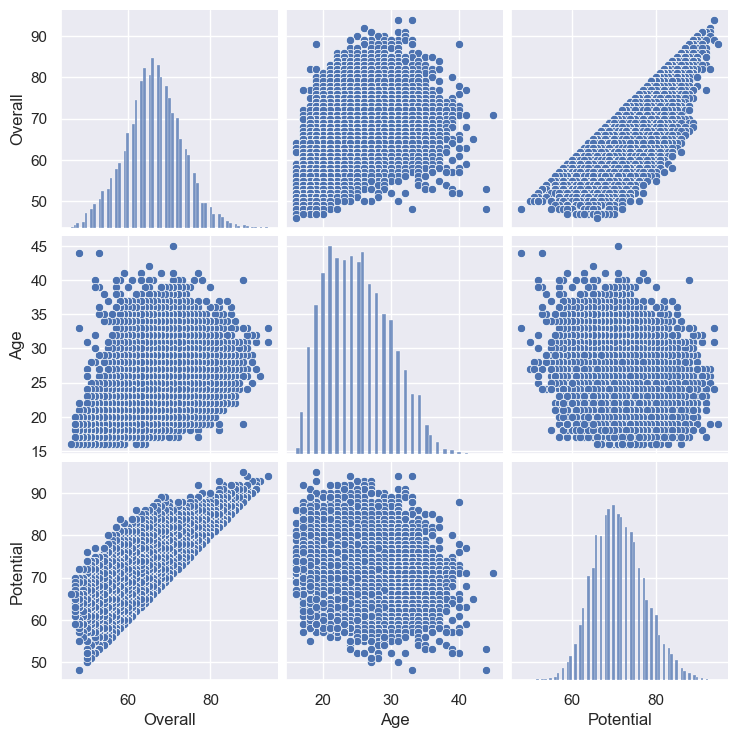

In [25]:
data = df[['Overall', 'Age', 'Potential',]]
sns.pairplot(data)
plt.show()
